# **BIKE SHARING ASSIGNMENT**

*PROBLEM STATEMENT* 

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

Steps taken through the study : 
    
    -Data prepration
    -Model building
    -Model evaulation

In [2]:
#importing libraries

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the dataframe

df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.size

11680

In [8]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
#there are 730 rows and 16 columns and no nulls, therefore no need to check for nulls.

In [10]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
#refering the dictionary we understand that the column 'instant' is of no use for analysis  so let's drop that

df.drop(['instant'], axis=1, inplace=True)

In [12]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#We can observe that the dtedat column is useless since month and year is already given so we can drop that. 
#Before dropping it we can derive a new column showing day_count

df['day_count'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [14]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_count
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
#Now we can drop 'dteday'

df.drop(['dteday'] , axis=1 , inplace=True)

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [17]:
#It can be observed from the dictionary that 'cnt' is sufficient for analysis therefore we can drop 'casual' and 'regestered'

In [18]:
df.drop(['casual'] , axis=1 , inplace=True)

In [19]:
df.drop(['registered'] , axis=1 , inplace=True)

In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [21]:
#checking correlation visually between variables

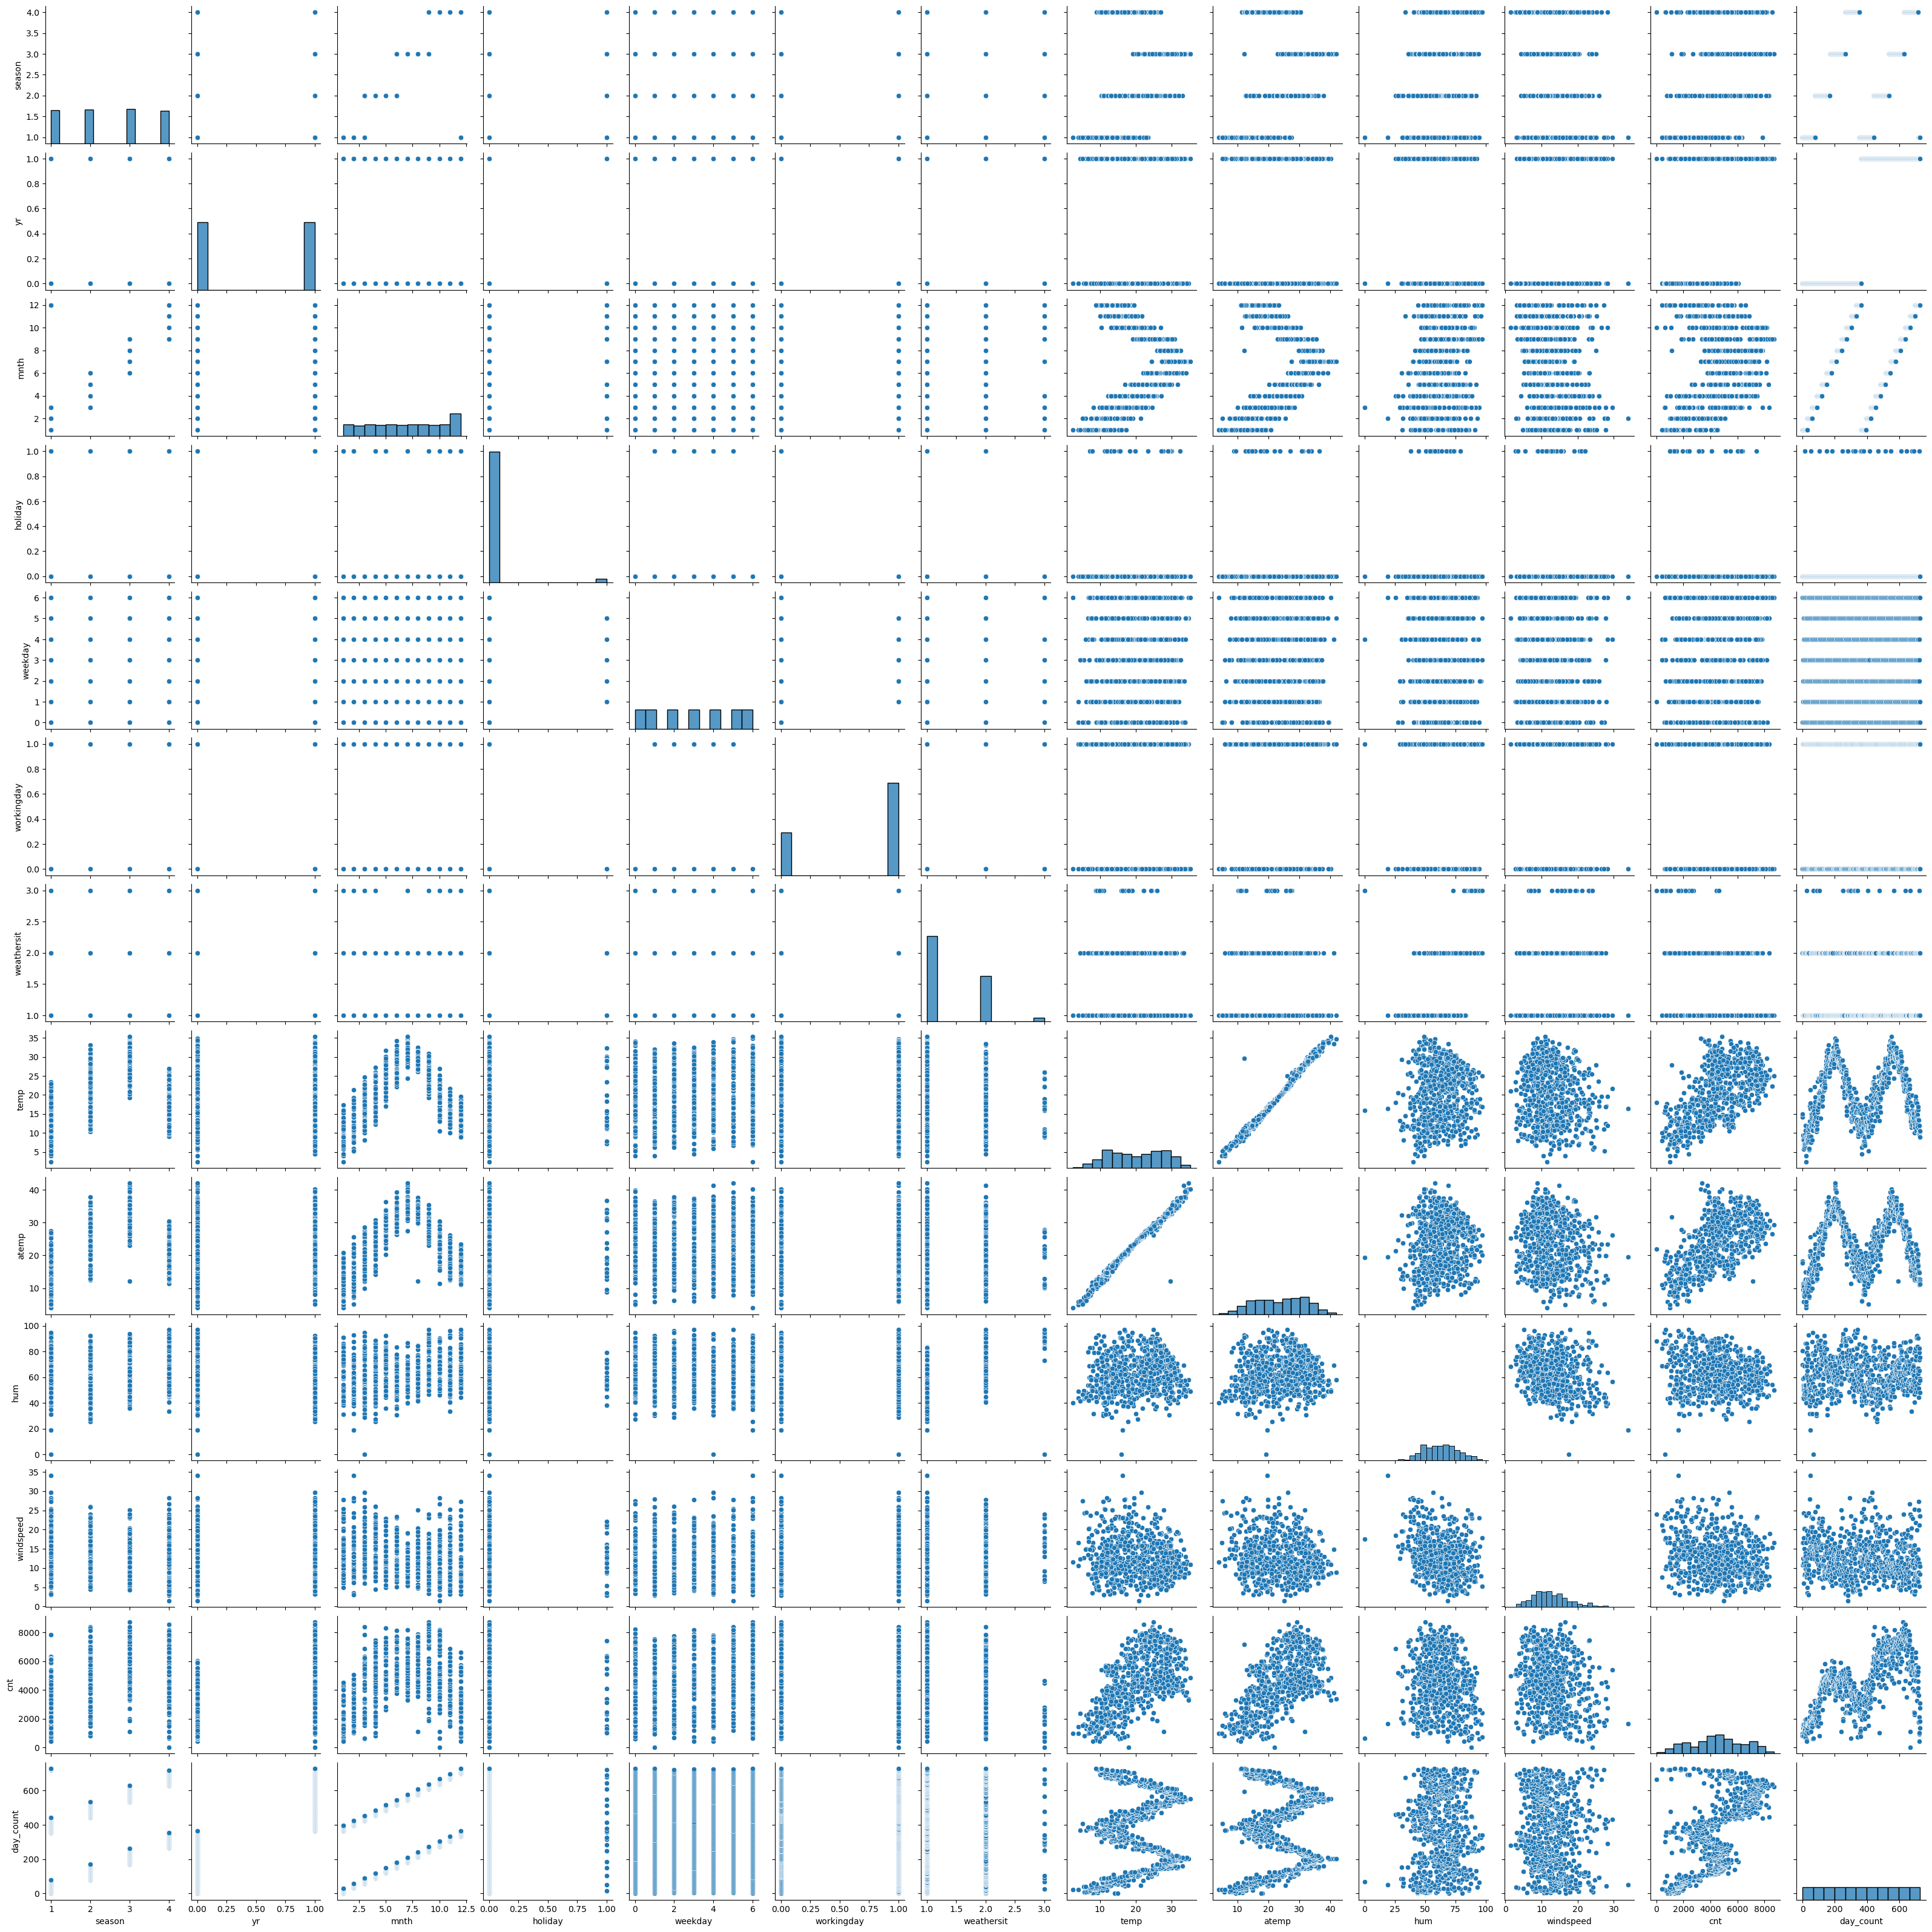

In [22]:
sns.pairplot(df)
plt.show()

In [23]:
#checking correlations

df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [24]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'day_count'],
      dtype='object')

In [25]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
day_count     730
dtype: int64

In [26]:
#lets check categorical data for correlation


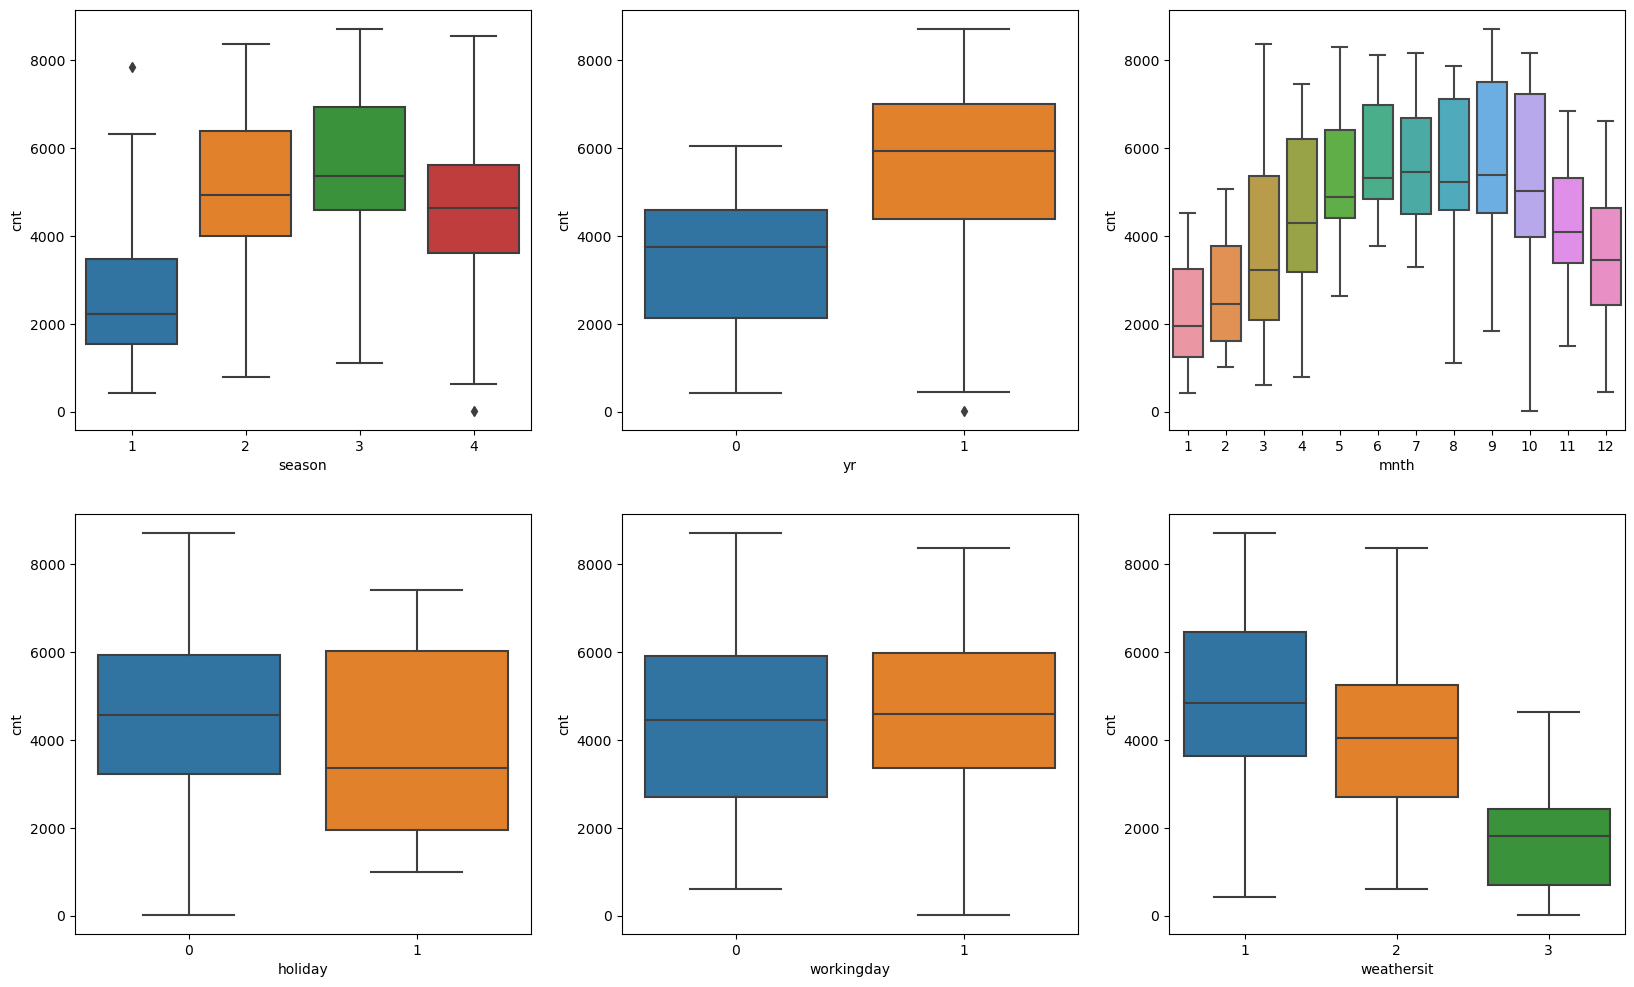

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

In [28]:
#converting categorical data to categories from numerical values

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}, inplace = True)

df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}, inplace = True)

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_count
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1500x3000 with 0 Axes>

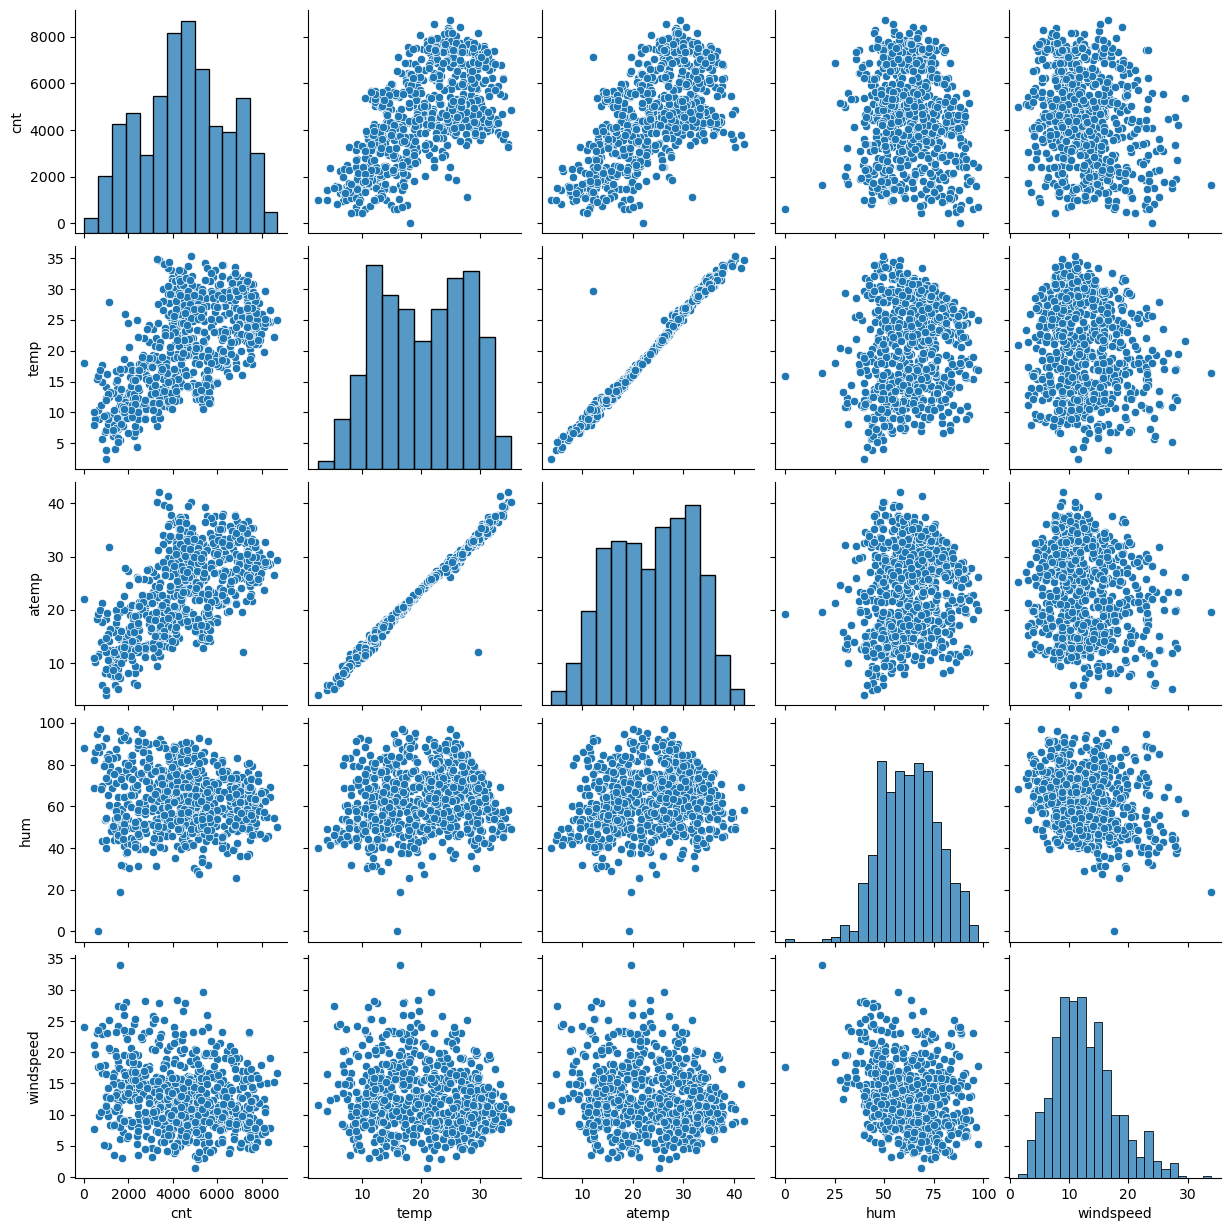

In [30]:
#Trying to find correlation in non categorical variables.

plt.figure(figsize =(15,30))
sns.pairplot(data=df, vars = ['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [31]:
#atemp and temp are highly correlated to cnt as well as between each other
#Checking the same through heatmap

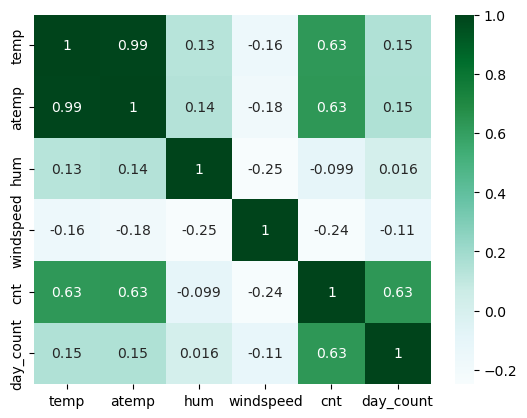

In [32]:
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt','day_count']].corr(), cmap='BuGn', annot = True)
plt.show()

In [33]:
#temp and atemp are extreamly correlated and derived by eath other. 

In [34]:
#checkking correlation between all variables

**Various conclusions can be drawn from the plots so far**

- Season-Fall has highest demand for rental bike

- Second year the demand of bikes has increased

- Bike demand goes high in summers like September has maximum demand and drops in winters

- No clarity on working day

- Good wether condition raise the demand of bikes.

- Demand of bike rental increases with temp and atemp.

- The bike demand is negatively correlated with windspeed and humidity.

- cnt is highly correlated with day_count.

- Data of windspeed is scttered and doesn,t seem to contribute much. 

In [35]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# DATA PREPARATION FOR LINEAR REGRESSION

In [36]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day_count
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [37]:
#CONVERTING CATEGORICAL DATA IN DUMMIES

In [38]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"], dtype=int, drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"], dtype=int)

In [39]:
#keeping the 'weathersit' to elaborate worst weather 

In [40]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_count,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


In [41]:
#splitting the data into test train sets
#importing required libraries

from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
df_train.shape

(510, 32)

In [43]:
df_test.shape

(219, 32)

In [44]:
#scaling the data

In [45]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','day_count', 'cnt']

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_count,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.505414,0.243137,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.288281,0.429398,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.255838,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.510989,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.759272,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
#Checking correlation coefficient to see highly correlated variables

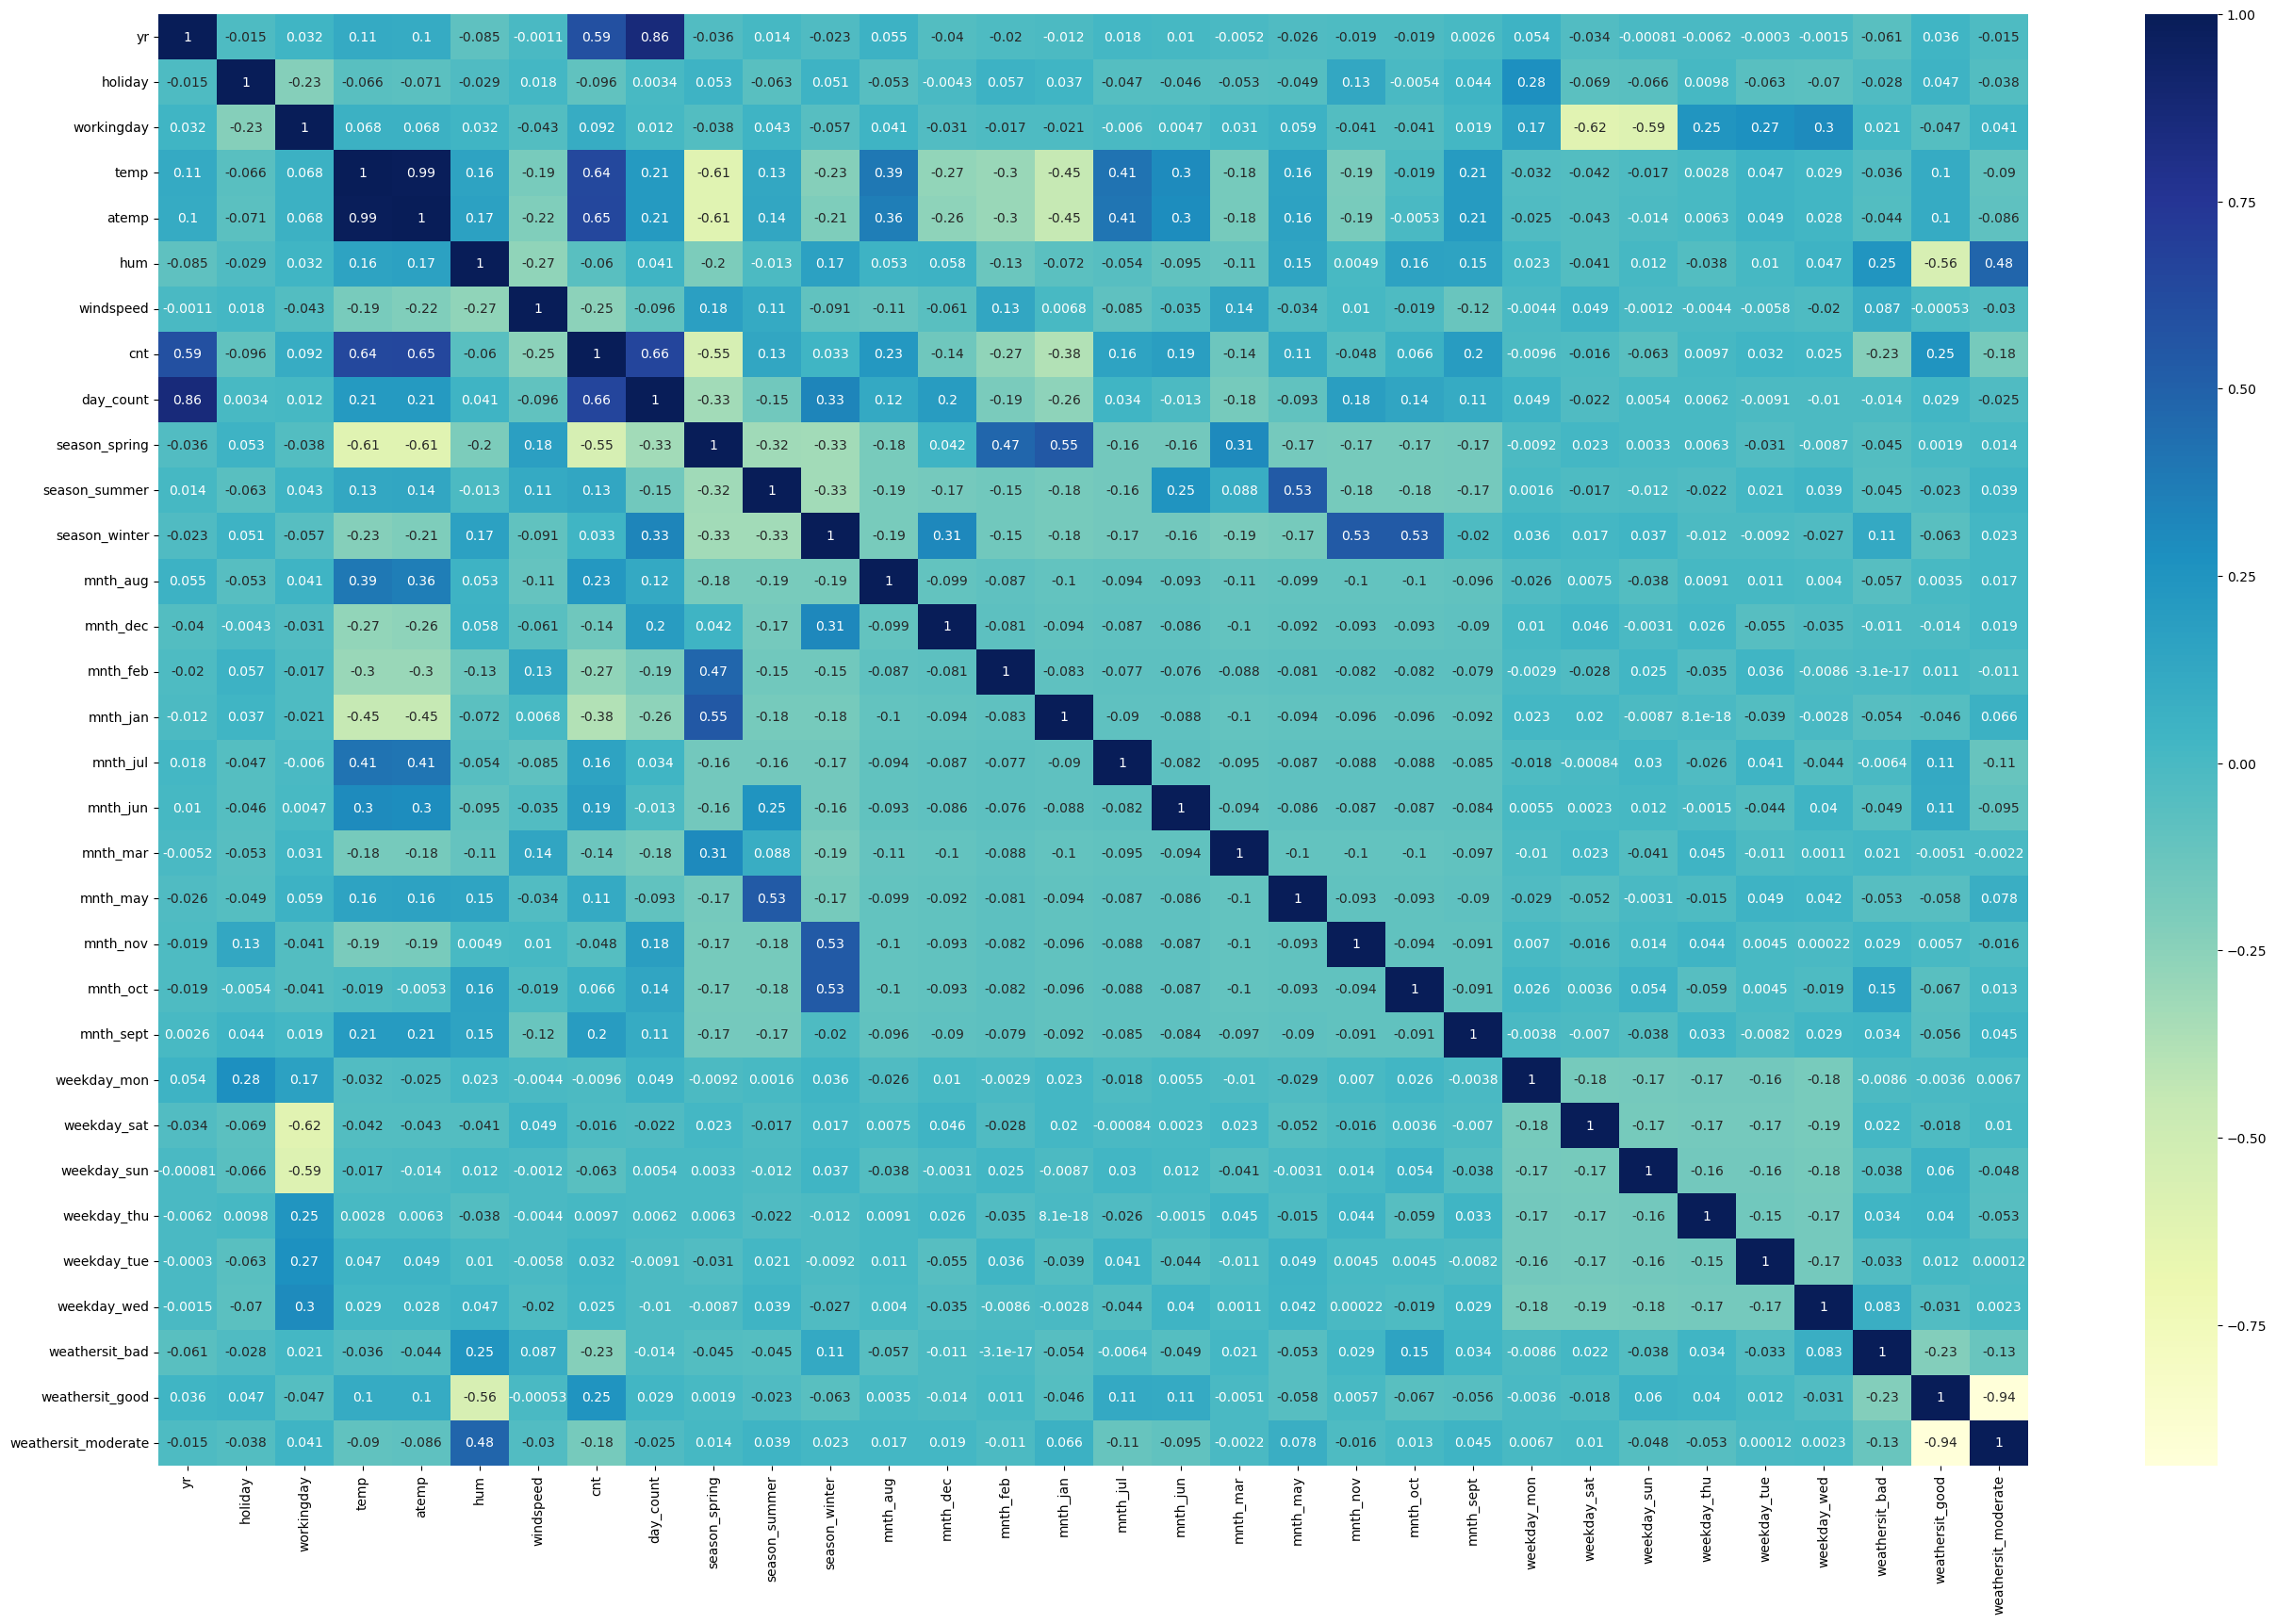

In [50]:
plt.figure(figsize = (32, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [51]:
#Our data has been prepared, now we can proceed with model building

# Model building

In [52]:
#Converting the test data in 'X' and 'y' for analysis.

In [53]:
y = df_train.pop('cnt')

In [54]:
X = df_train

In [55]:
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,day_count,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.896978,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.791209,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.585165,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.662088,0,1,...,0,0,1,0,0,0,0,0,0,1


In [56]:
y.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [57]:
#For builing a linear model we need to import following libraries

import statsmodels.api as sm

# Add a constant and check for temp as it is showing high correlation with cnt.
X_lm = sm.add_constant(X[['temp']])

# Create a first fitted model
lr = sm.OLS(y, X_lm).fit()

In [58]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

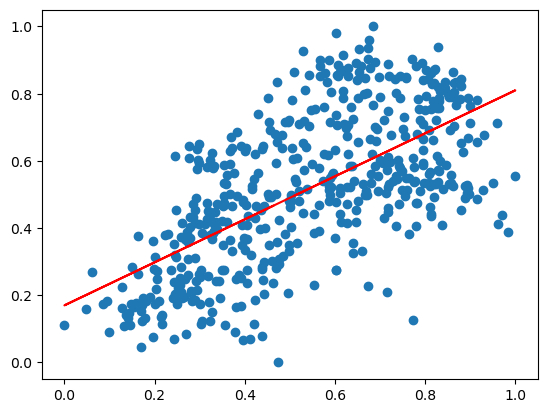

In [59]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_lm.iloc[:, 1], y)
plt.plot(X_lm.iloc[:, 1], 0.17 + 0.64*X_lm.iloc[:, 1], 'r')
plt.show()

In [60]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           5.80e-61
Time:                        19:19:31   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

Adding another variable

The R-squared value obtained is 0.414. Since we have so many variables, we can clearly do better than this. 
So let's go ahead and add the second most highly correlated variable, i.e. day_count.

In [61]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'day_count', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [62]:
X_lm =  X[['temp' ,'day_count']]

In [63]:
import statsmodels.api as sm

# Add a constant and check for temp as it is showing high correlation with cnt.
X_lm = sm.add_constant(X_lm)

# Create a first fitted model
lr = sm.OLS(y, X_lm).fit()

In [64]:
lr.params

const        0.017042
temp         0.523978
day_count    0.425521
dtype: float64

In [65]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     588.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          7.53e-133
Time:                        19:19:31   Log-Likelihood:                 344.53
No. Observations:                 510   AIC:                            -683.1
Df Residuals:                     507   BIC:                            -670.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0170      0.016      1.082      0.2

In [66]:
#So the R=sqp has improved from 0.41 to 0.47, lets add another variable and check



In [67]:
X_lm =  X[['temp' ,'day_count', 'weathersit_good']]

In [68]:
import statsmodels.api as sm

X_lm = sm.add_constant(X_lm)

lr = sm.OLS(y, X_lm).fit()

In [69]:
lr.params

const             -0.026225
temp               0.505764
day_count          0.424374
weathersit_good    0.085477
dtype: float64

In [70]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     461.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.17e-144
Time:                        19:19:31   Log-Likelihood:                 374.68
No. Observations:                 510   AIC:                            -741.4
Df Residuals:                     506   BIC:                            -724.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0262      0.016     

In [71]:
#Here again we have improved R-sqr. p Value for all checked varables is still '0'. 
#Now let's go ahead and add all the feature variables

# Adding all the variables to the model

In [72]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_1 = sm.OLS(y, X_lm).fit()


In [73]:
lr_1.params

const                  0.135615
yr                     0.283838
holiday               -0.016736
workingday             0.069650
temp                   0.403050
atemp                  0.048463
hum                   -0.150985
windspeed             -0.184187
day_count             -0.102904
season_spring         -0.049105
season_summer          0.038326
season_winter          0.104790
mnth_aug               0.033575
mnth_dec              -0.010566
mnth_feb              -0.040102
mnth_jan              -0.074687
mnth_jul              -0.026183
mnth_jun               0.007140
mnth_mar              -0.002717
mnth_may               0.028826
mnth_nov              -0.010765
mnth_oct               0.034599
mnth_sept              0.103530
weekday_mon           -0.021478
weekday_sat            0.068663
weekday_sun            0.014039
weekday_thu           -0.009787
weekday_tue           -0.019336
weekday_wed           -0.005784
weathersit_bad        -0.105693
weathersit_good        0.151333
weathers

In [74]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     96.33
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.09e-180
Time:                        19:19:31   Log-Likelihood:                 528.08
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     480   BIC:                            -869.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1356    

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

# Checking VIF

In [75]:
#importing required variables

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,weathersit_moderate,inf
1,holiday,inf
2,workingday,inf
29,weathersit_good,inf
28,weathersit_bad,inf
24,weekday_sun,inf
23,weekday_sat,inf
7,day_count,576.76
0,yr,438.59
12,mnth_dec,67.81


In [78]:
#We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [79]:
#Dropping holiday which gas a high 'p' and 'VIF'

In [80]:
X = X.drop('holiday', axis=1,)

In [81]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,day_count,576.76
0,yr,438.59
28,weathersit_good,195.09
29,weathersit_moderate,109.94
11,mnth_dec,67.81
2,temp,67.22
18,mnth_nov,56.60
3,atemp,56.23
19,mnth_oct,44.06
20,mnth_sept,27.87


In [82]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_2 = sm.OLS(y, X_lm).fit()

In [83]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     96.33
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.09e-180
Time:                        19:19:32   Log-Likelihood:                 528.08
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     480   BIC:                            -869.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1231    

In [84]:
X = X.drop('atemp', axis=1,)

In [85]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,day_count,575.34
0,yr,437.58
27,weathersit_good,195.09
28,weathersit_moderate,109.94
10,mnth_dec,67.66
17,mnth_nov,56.49
18,mnth_oct,43.98
19,mnth_sept,27.86
9,mnth_aug,23.99
13,mnth_jul,13.65


In [86]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_3 = sm.OLS(y, X_lm).fit()

In [87]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.95
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.52e-181
Time:                        19:19:32   Log-Likelihood:                 528.01
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     481   BIC:                            -875.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1228    

In [88]:
X = X.drop('day_count', axis=1,)

In [89]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,weathersit_good,110.76
27,weathersit_moderate,65.90
5,season_spring,10.79
1,workingday,10.10
7,season_winter,9.50
6,season_summer,8.29
20,weekday_sat,7.75
21,weekday_sun,7.30
2,temp,7.12
25,weathersit_bad,7.11


In [90]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_4 = sm.OLS(y, X_lm).fit()

In [91]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.74e-182
Time:                        19:19:32   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1117    

In [92]:
X = X.drop('season_spring', axis=1,)

In [93]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,weathersit_good,96.20
26,weathersit_moderate,58.23
1,workingday,10.09
19,weekday_sat,7.75
20,weekday_sun,7.30
2,temp,7.01
15,mnth_nov,6.79
16,mnth_oct,6.59
24,weathersit_bad,6.54
6,season_winter,6.08


In [94]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_5 = sm.OLS(y, X_lm).fit()

In [95]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.99e-182
Time:                        19:19:32   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0898    

In [96]:
X = X.drop('weekday_sun', axis=1,)

In [97]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,weathersit_good,66.06
25,weathersit_moderate,42.14
2,temp,6.97
15,mnth_nov,6.73
16,mnth_oct,6.57
6,season_winter,6.04
8,mnth_dec,5.62
10,mnth_jan,5.21
7,mnth_aug,5.11
23,weathersit_bad,5.10


In [98]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_6 = sm.OLS(y, X_lm).fit()

In [99]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          4.96e-183
Time:                        19:19:33   Log-Likelihood:                 525.98
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     484   BIC:                            -889.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1117    

In [100]:
X = X.drop('mnth_aug', axis=1,)

In [101]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,weathersit_good,61.01
24,weathersit_moderate,39.09
6,season_winter,6.04
2,temp,5.98
14,mnth_nov,5.21
22,weathersit_bad,4.85
15,mnth_oct,4.60
7,mnth_dec,4.25
9,mnth_jan,4.13
5,season_summer,2.89


In [102]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_7 = sm.OLS(y, X_lm).fit()

In [103]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.09e-183
Time:                        19:19:33   Log-Likelihood:                 525.05
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     485   BIC:                            -894.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1230    

In [104]:
X = X.drop('mnth_oct', axis=1,)

In [105]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,weathersit_good,56.38
23,weathersit_moderate,36.90
2,temp,5.42
21,weathersit_bad,4.61
9,mnth_jan,3.50
6,season_winter,2.78
5,season_summer,2.58
1,workingday,2.56
8,mnth_feb,2.46
3,hum,2.01


In [106]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_8 = sm.OLS(y, X_lm).fit()

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     121.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.23e-184
Time:                        19:19:33   Log-Likelihood:                 524.82
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     486   BIC:                            -900.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1177    

In [107]:
X = X.drop('mnth_may', axis=1,)

In [108]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
21,weathersit_good,55.72
22,weathersit_moderate,36.50
2,temp,5.29
20,weathersit_bad,4.55
9,mnth_jan,3.49
6,season_winter,2.77
1,workingday,2.56
8,mnth_feb,2.46
7,mnth_dec,2.01
5,season_summer,2.00


In [109]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_9 = sm.OLS(y, X_lm).fit()

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     126.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.26e-185
Time:                        19:19:33   Log-Likelihood:                 524.65
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     487   BIC:                            -905.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1158    

In [110]:
X = X.drop('weekday_wed', axis=1,)

In [111]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,weathersit_good,55.70
21,weathersit_moderate,36.46
2,temp,5.29
19,weathersit_bad,4.55
9,mnth_jan,3.49
6,season_winter,2.77
8,mnth_feb,2.46
7,mnth_dec,2.01
5,season_summer,2.00
3,hum,1.99


In [112]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_10 = sm.OLS(y, X_lm).fit()

print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.39e-186
Time:                        19:19:33   Log-Likelihood:                 524.39
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     488   BIC:                            -911.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1159    

In [113]:
X = X.drop('weekday_thu', axis=1,)

In [114]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,weathersit_good,55.69
20,weathersit_moderate,36.46
2,temp,5.28
18,weathersit_bad,4.55
9,mnth_jan,3.48
6,season_winter,2.77
8,mnth_feb,2.46
5,season_summer,2.00
7,mnth_dec,2.00
3,hum,1.99


In [115]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_11 = sm.OLS(y, X_lm).fit()

print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.45e-187
Time:                        19:19:34   Log-Likelihood:                 524.15
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     489   BIC:                            -917.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1156    

In [116]:
X = X.drop('mnth_jun', axis=1,)

In [117]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,weathersit_good,55.59
19,weathersit_moderate,36.42
2,temp,4.73
17,weathersit_bad,4.55
9,mnth_jan,3.42
6,season_winter,2.77
8,mnth_feb,2.44
7,mnth_dec,1.98
5,season_summer,1.94
3,hum,1.93


In [118]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_12 = sm.OLS(y, X_lm).fit()

print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.14e-188
Time:                        19:19:34   Log-Likelihood:                 523.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     490   BIC:                            -922.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1166    

In [119]:
X = X.drop('mnth_jan', axis=1,)

In [120]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,weathersit_good,35.47
18,weathersit_moderate,26.03
16,weathersit_bad,3.81
6,season_winter,2.08
2,temp,1.97
3,hum,1.90
1,workingday,1.78
14,weekday_sat,1.67
11,mnth_nov,1.67
9,mnth_jul,1.44


In [121]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_13 = sm.OLS(y, X_lm).fit()

print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.46e-186
Time:                        19:19:34   Log-Likelihood:                 515.91
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     491   BIC:                            -913.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0556    

In [122]:
X = X.drop('mnth_feb', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,weathersit_good,33.12
17,weathersit_moderate,24.82
15,weathersit_bad,3.69
6,season_winter,2.00
3,hum,1.90
1,workingday,1.78
2,temp,1.76
13,weekday_sat,1.67
10,mnth_nov,1.65
8,mnth_jul,1.44


In [123]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_14 = sm.OLS(y, X_lm).fit()

print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.02e-187
Time:                        19:19:34   Log-Likelihood:                 515.86
No. Observations:                 510   AIC:                            -995.7
Df Residuals:                     492   BIC:                            -919.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0537    

In [124]:
X = X.drop('mnth_mar', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,weathersit_good,32.56
16,weathersit_moderate,24.53
14,weathersit_bad,3.66
6,season_winter,1.97
3,hum,1.90
1,workingday,1.77
2,temp,1.71
12,weekday_sat,1.66
9,mnth_nov,1.64
8,mnth_jul,1.44


In [125]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_15 = sm.OLS(y, X_lm).fit()

print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.59e-188
Time:                        19:19:34   Log-Likelihood:                 515.31
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     493   BIC:                            -924.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0568    

In [126]:
X = X.drop('weekday_tue', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,weathersit_good,32.54
15,weathersit_moderate,24.51
13,weathersit_bad,3.65
6,season_winter,1.97
3,hum,1.90
2,temp,1.71
1,workingday,1.67
12,weekday_sat,1.66
9,mnth_nov,1.64
8,mnth_jul,1.43


In [127]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_16 = sm.OLS(y, X_lm).fit()

print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.76e-189
Time:                        19:19:34   Log-Likelihood:                 514.60
No. Observations:                 510   AIC:                            -997.2
Df Residuals:                     494   BIC:                            -929.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0579    

In [128]:
X = X.drop('mnth_dec', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_good,32.25
14,weathersit_moderate,24.41
12,weathersit_bad,3.65
3,hum,1.89
6,season_winter,1.70
1,workingday,1.67
11,weekday_sat,1.66
2,temp,1.61
7,mnth_jul,1.43
8,mnth_nov,1.43


In [129]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_17 = sm.OLS(y, X_lm).fit()

print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          6.67e-190
Time:                        19:19:34   Log-Likelihood:                 513.64
No. Observations:                 510   AIC:                            -997.3
Df Residuals:                     495   BIC:                            -933.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0562    

In [130]:
X = X.drop('mnth_nov', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_good,32.09
13,weathersit_moderate,24.33
11,weathersit_bad,3.64
3,hum,1.89
1,workingday,1.66
10,weekday_sat,1.65
2,temp,1.61
7,mnth_jul,1.43
5,season_summer,1.33
6,season_winter,1.29


In [131]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_18 = sm.OLS(y, X_lm).fit()

print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          9.69e-191
Time:                        19:19:35   Log-Likelihood:                 512.86
No. Observations:                 510   AIC:                            -997.7
Df Residuals:                     496   BIC:                            -938.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0545    

In [132]:
X = X.drop('weekday_mon', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,weathersit_good,32.08
12,weathersit_moderate,24.32
10,weathersit_bad,3.64
3,hum,1.89
1,workingday,1.65
9,weekday_sat,1.64
2,temp,1.60
7,mnth_jul,1.43
5,season_summer,1.33
6,season_winter,1.29


In [133]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_19 = sm.OLS(y, X_lm).fit()

print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.26e-191
Time:                        19:19:35   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0540    

In [134]:
X = X.drop('mnth_jul', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weathersit_good,32.07
11,weathersit_moderate,24.32
9,weathersit_bad,3.64
3,hum,1.87
1,workingday,1.65
8,weekday_sat,1.64
2,temp,1.27
6,season_winter,1.25
5,season_summer,1.19
4,windspeed,1.18


In [135]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_20 = sm.OLS(y, X_lm).fit()

print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.89e-191
Time:                        19:19:35   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0526    

In [136]:
X = X.drop('weathersit_good', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
10,weathersit_moderate,2.10
0,yr,2.02
8,weekday_sat,1.79
6,season_winter,1.66
5,season_summer,1.58
7,mnth_sept,1.20


In [137]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_21 = sm.OLS(y, X_lm).fit()

print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.89e-191
Time:                        19:19:35   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1698    

In [138]:
X = X.drop('hum', axis=1,)

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,weekday_sat,1.69
4,season_summer,1.57
9,weathersit_moderate,1.53
5,season_winter,1.40
6,mnth_sept,1.20
8,weathersit_bad,1.08


In [139]:
import statsmodels.api as sm

X_lm = sm.add_constant(X)

lr_22 = sm.OLS(y, X_lm).fit()

print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.47e-188
Time:                        19:19:35   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0753    

In [140]:
#It can be observed that all 'p' values are below 0.05 and VIFs are below 5. Now we can proceed to test the model,

# Model evaluation

Residual Analysis of the train data

In [141]:
y_train = lr_22.predict(X_lm)

Text(0.5, 0, 'Errors')

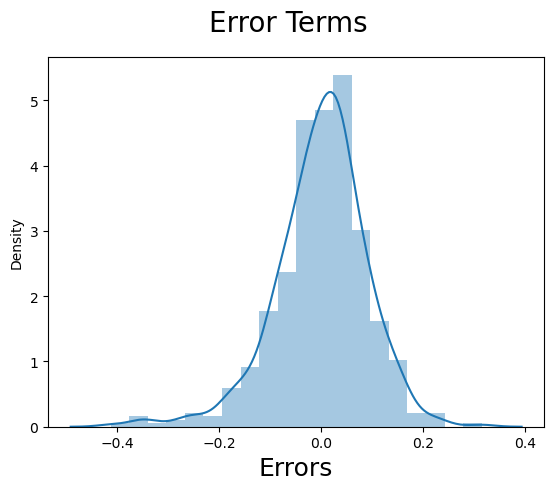

In [142]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - y_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [143]:
#It can be observed that the errors has a normal distribution

Making Predictions Using the Final Model

In [144]:
#Applying the scaling on the test sets

In [145]:
num_vars = ['temp','atemp','hum','windspeed','day_count', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [146]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day_count,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.488704,0.255708,...,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.652968,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.293496,0.437258,...,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.004121,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.233516,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.478022,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.736951,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.001374,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [147]:
#Deviding data into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [149]:
#adding a constant
X_test_22 = sm.add_constant(X_test)


In [150]:
s_1 =set(X_test.columns)
s_2 =set(X_lm.columns)

In [151]:
my_list = list(s_1-s_2)
print(my_list)

['mnth_nov', 'season_spring', 'mnth_oct', 'mnth_jun', 'weekday_thu', 'weathersit_good', 'hum', 'atemp', 'weekday_sun', 'weekday_tue', 'mnth_dec', 'mnth_jan', 'weekday_wed', 'mnth_may', 'holiday', 'mnth_jul', 'day_count', 'mnth_mar', 'mnth_aug', 'weekday_mon', 'mnth_feb']


In [152]:
#We need to drop the columns from X_test_22 which we dropped for the model building

X_test_22 = X_test_22.drop((my_list), axis = 1)

In [153]:
X_test_22.head()

,const,yr,workingday,temp,windspeed,season_summer,season_winter,mnth_sept,weekday_sat,weathersit_bad,weathersit_moderate
184,1.0,0,0,0.831783,0.084219,0,0,0,0,0,1
535,1.0,1,1,0.901354,0.153728,1,0,0,0,0,0
299,1.0,0,1,0.511964,0.334206,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,1,0.817246,0.537414,1,0,0,0,0,0


In [154]:
#Testing the test data

y_pred_22 = lr_22.predict(X_test_22)

Text(0, 0.5, 'y_pred')

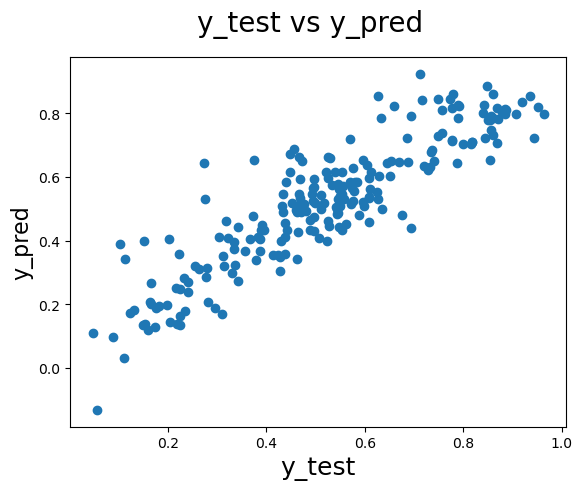

In [155]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_22)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [157]:
# The trend of the plot shows very nice corelation between test and predicted data. 
#Therefor eWe can say that the model is performing well.


The equation for our best fitted line will be:
    
    0.233*yr + 0.056*workingday + 0.55*temp - 0.155*windspeed + 0.08*season_summer + 0.13*season_summer + 0.097*month_sep + 0.067*weekday_sat - 0.288*weathersit_bad - 0.081*weathersit_moderate 

In [158]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_22)

0.7955844377237249

In [ ]:
# A value of approximately 0.8 of r2 shows that the model is efficient enough to predict the correlation.